#**Random Forest**

Random Forest is also an Ensemble Technique. Topics we need to know before studting Random Forest are: 

 * Decision Trees
 * Bagging Ensemble 
 

**Why the name 'RANDOM FOREST'?**

The word **Random** comes from the fact because it is a Bagging based technique. 

The fullform of Bagging is Bootstraped Aggregation, wherein Bootstrap means to take random samples from the data.  


It is called a **Forest** because of using multiple Decision Trees together or is basically a group of trees.

We already know that in a Bagging technique we can use any of the Base algorithms such as KNN, SVM, etc. But when in a Bagging Technique, a Decision Tree is used as a base algorithm, it is known as a RANDOM FOREST.

Thus, we can easily say that Random Forest is just a specialisation of a Bagging Technique.

**How Random Forest works? (Bagging)**: Suppose we have a dataset, which has 1000 rows, we pick base models, and since this is a Random forest, we pick Decision Trees as base models.

The data samples are given to every Decision Tree. Sampling can be done in three methods:

**1> Row sampling**: in a dataset of 1000 rows, randomly 500 rows sample is given to each Decision Tree. We can have samples with replacement(including duplicate rows) or without replacements(without including duplicate rows).

**2> Column/Feature samping:** if we had 10 columns in all, we randomly give 5 columns as samples to every Decision Tree. Again we have samples with or withour replacements.

**>3 Combination sampling:** In this the sampling is done on the basis of rows  as well as columns both.


Next in Bootstrapping,  Random Forest model is trained using all these Decision Trees which are trained using subsets of data(sampling data) .All of them are  trained with different data, therefore, every Decision Tree looks different.


Now in Aggregation, this is for prediction, for example this is a classification problem and we have 100 Decision Trees. Now we have a new query point X to be predicted, it is to be given to every Decision Tree and every tree gave a prediction of its own as 0,1,1,0,0,0,1,0,.. Let us say, 43 trees gave 0 and 57 gave 1. Then 57>43 so, 1 will be predicted as the final output for the query point X.

If it was a Regression problem, then each tree would give a number as an output and the mean of it is going to be taken.





**Code for Random Forest concept (mostly bagging, this code will give you the feel, but its not exactly Random Forest):**

In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

In [36]:
X,y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [37]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.691716,-1.224282,-0.499588,-3.235917,-2.241446,1
1,1.491649,-0.922048,2.084620,-0.920107,-0.828605,1
2,-1.123994,-1.401168,-0.406457,1.731397,0.704058,0
3,0.269324,-1.066662,1.196042,-1.546662,-0.959406,1
4,0.490364,0.362250,-0.585842,0.566009,1.016280,0


In [38]:
#function for row sampling
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [39]:
#function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:,-1],int(percent*df.shape[1]))
  return df[cols]

In [40]:
#function for combined sampling
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

we will have 3 decision trees and will be creating 3 datasets from sampling, here we are creating datasets from row sampling.

In [41]:
df1 = sample_rows(df,0.1)      #dataset1 for DecisionTree1

In [42]:
df2 = sample_rows(df,0.1)      #dataset2 for DecisionTree2

In [43]:
df3 = sample_rows(df,0.1)      #dataset3 for DecisionTree3

0.1 here means 10% rows.

In [44]:
df1.shape

(10, 6)

In [45]:
df2.shape

(10, 6)

In [46]:
df3.shape

(10, 6)

In [47]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [48]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])


DecisionTreeClassifier()

In [49]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[0] <= 0.659\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

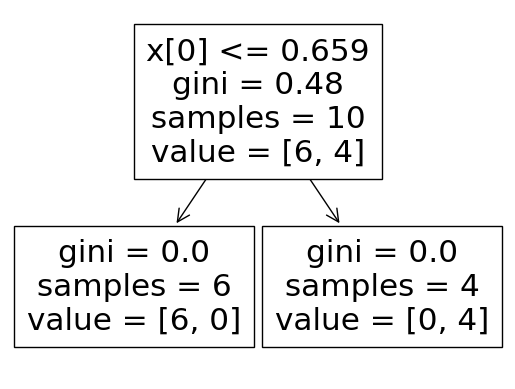

In [50]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[4] <= -0.435\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

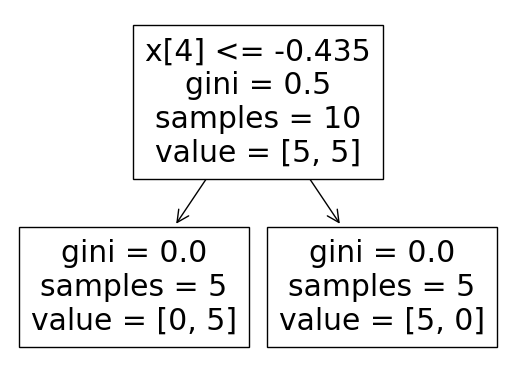

In [51]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[1] <= -0.053\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

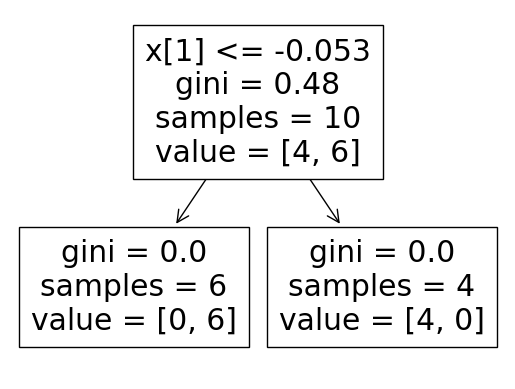

In [52]:
plot_tree(clf3)

In [53]:
clf1.predict(np.array([0.955507,0.972416,0.823973,-0.795320,0.911606]).reshape(1,5))

array([1])

In [54]:
clf2.predict(np.array([0.955507,0.972416,0.823973,-0.795320,0.911606]).reshape(1,5))

array([0])

In [55]:
clf3.predict(np.array([0.955507,0.972416,0.823973,-0.795320,0.911606]).reshape(1,5))

array([0])

Inference: All the three Decision Trees give zero as the output.

We know that Random Forest gives much better results as compared to any other algorithm. But Why?

The reason is **Bias Variance Tradeoff**!

The error is made of two things , Bias and Variance, Bias is basically when your ML model is not able to give good results on the training data, this is lao known as HIGH BIAS.

Variance is when your model is good with the training data but not on the test data, this is high variance. 

We always want a low bias, low variance (LBLV) in our model. They both are inversely proportional.

Most of the algorithms that we have are, Low Bias and High Variance , an example of this is a fully grown Decision Tree , SVM , KNN.

Another type of algorithms are High Bias and Low varince, examples are Linear Regression and Logistic Regression.

**An interesting thing about Random Forests is when a LBLV algorithm is given so it converts it to the ideal Low Bias, Low Variance model.**

How does that happen?

We have few base models which are fully grown Decision trees which means they all are Low Bias and High Variance (makes mistakes on the test data). We feed a subset of data to every decision tree and post training, the LB remains the same but when subsets of data is given to sooo many trees in a forests, the noisy data is also equally distributed and which distributes the impact of noisy points and the variance is also reduced.

## Example of this through a Code:

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [57]:
np.random.seed(42)
X,y = make_circles(n_samples=500, factor=0.1 , noise=0.35, random_state=42)
X_train , X_test, y_train ,y_test = train_test_split(X,y,test_size=0.2) 

In [58]:
X.shape

(500, 2)

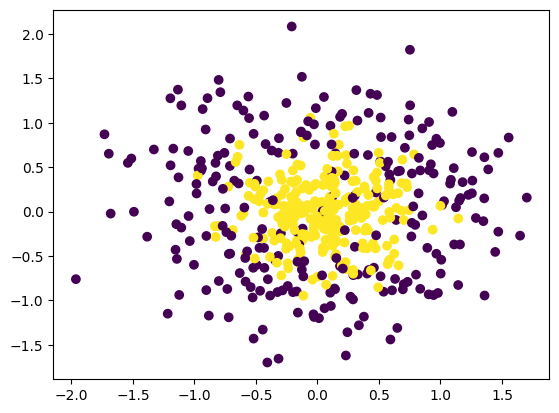

In [59]:

plt.scatter(X[:,0],X[:,1],c=y)

**Inference**: This is a classification data, which has a upper class and a lower class. And the data is showing concentric circles type of behaviour.

We will first use a Decision Tree to classiy between both the classes and then same goes  for Random Forest and then we can compare the performances.

**Decision Tree Classifier:**

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)



DecisionTreeClassifier(random_state=42)

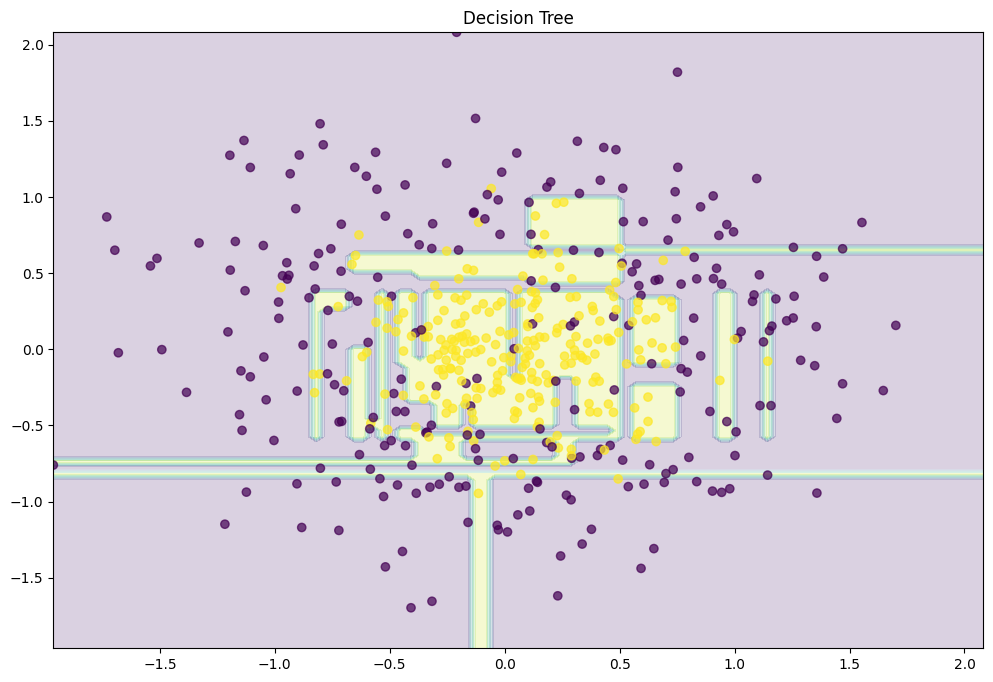

In [62]:
plt.figure(figsize=(12,8))
X_range = np.linspace(X.min(),X.max(),100)
xx1, xx2 = np.meshgrid(X_range , X_range)
y_hat = dtree.predict(np.c_[xx1.ravel() , xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1 , xx2, y_hat , alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=0.7)
plt.title("Decision Tree")
plt.show()

**Inference**: This is a fully grown Decision Tree , with Low Bias and High Variance and the algorithm is overfitting.

**Random Forest Classifier:**

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier(n_estimators=500 , random_state=42)
rf.fit(X_train , y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

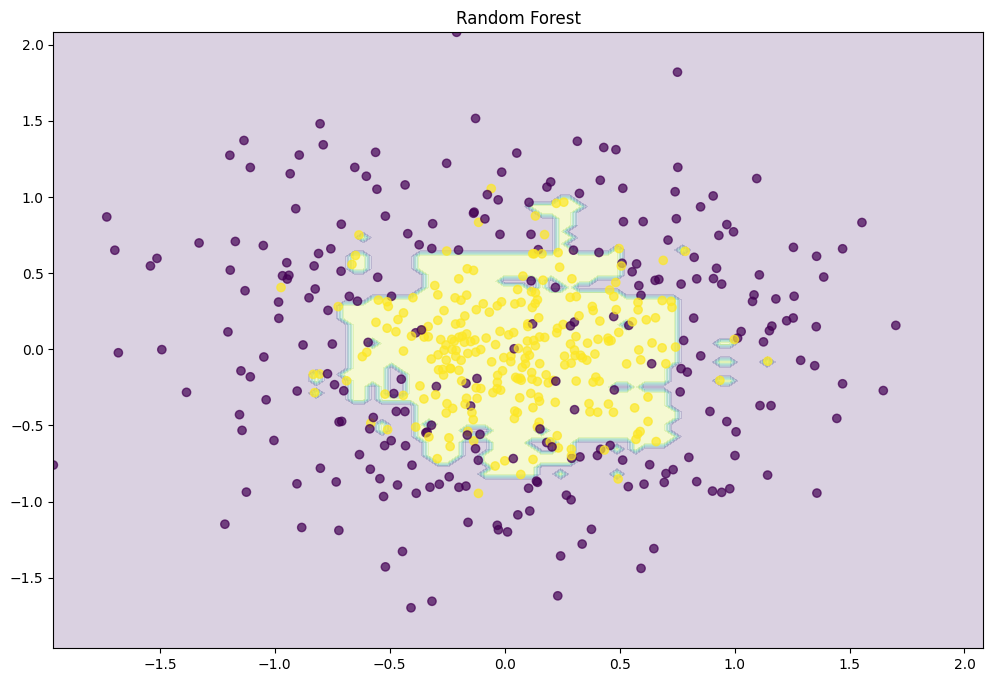

In [65]:
plt.figure(figsize=(12,8))
X_range = np.linspace(X.min() , X.max() , 100)
xx1 , xx2 = np.meshgrid(X_range , X_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1 , xx2, y_hat , alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=0.7)
plt.title("Random Forest")
plt.show()

Inference: from the graph it can be seen it has Low Bias and Low Variance. Although, the bias has increased a bit but the variance has a decreased a lot, this is what makes Random Forest a great algorithm, because it converts an algorithm to LOW BIAS , LOW VARIANCE algorithm.

# Bagging v/s Random Forest 

Random Forest internally is an implementation of Bagging, but surely they both are not the same, we are going to list some major and important difference between the two:

* Bagging helps us use different algorithms as base models. In short, Bagging is a general technique, used for different algorithms for better results. Whereas, in Random Forests, only and only Decision Trees are used as base algorithms.

* so, if we take a decision tree in a bagging method, will it considered a random forest?? NOO. Another difference between the two is that sampling (column or row sampling) in bagging is done at tree level and in Random Forest, it is Node level.(after every node sampling is done)

# Code for Random Forest

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import accuracy_score

from google.colab import files
import warnings
warnings.filterwarnings("ignore")

In [67]:
files.upload()

Saving heart.csv to heart (1).csv


{'heart.csv': b'age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,0,1,178,0,0,2,

In [68]:
df = pd.read_csv('heart.csv')


In [69]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
df.shape

(303, 14)

In [71]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [72]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [74]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

In [75]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test , y_pred)

0.8688524590163934

In [76]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test , y_pred)

0.7704918032786885

In [77]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test , y_pred)

0.7049180327868853

In [78]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test , y_pred)

0.8852459016393442

Comparative studies show that even after the data being linear, Random Forest works with good results.